# Exploratory Data Analysis on Titanic Dataset

The dataset contains 12 columns or features. For every individual person we have information about
1. PassengerID - Id number of passenger in the dataset
2. Survived - Person survived or not (0 for no & 1 for yes)
3. Pclass - With what class of ticket that passenger was travelling
4. Name - Name of the passenger
5. Sex - Male or Female
6. Age - Age of the passenger in years
7. SibSp - Number of siblings/spouses in titanic
8. Parch - Number of parents/children on the titanic
9. Ticket - Ticket number
10. Fare - Amount of money that person paid to travel
11. Cabin - Cabin number of passenger
12. Embarked - Port of Embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This is how our data looks like.
Observations:-
1. There are 12 columns or features in this dataset as mentioned above
2. There are both numerical and categorical variable in this dataset
3. Here the Survived column is a target variable or class label

In [4]:
print('Shape of the data: ',data.shape)
data.info()

Shape of the data:  (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observations:-
1. Shape of the data (891,12) means that we have 891 rows & 12 columns. 891 rows means that we have data of 891 passengers.
2. In the above output, column consist of column names, Non-Null Count means how many non null values we have in that column and Dtype means the data type of that column (int64 means int value, float64 means float value and object means string value)
3. In age column, we can see that only 714 non-null values are present that means we have 177 null values in that column.(891-714)
4. Same as in cabin column there are only 204 non null values which means that 687 null values are present in this column which is a huge value. Due to large missing values, we can drop this column while making model.

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations:-
1. Here some features are not necessary like passengerId so we will not include that. Features like age and fare are need to be analysed.
2. In the age feature, the count is 714 which means the age of 714 passengers are non null values else are null values as mentioned above. The mean value of 714 passengers is 29.69 which means that the mean age is 29.69 years. Std(Standard Deviation) is 14.52 which means that most of the passengers have the age inbetween (29.69 + 14.52) to (29.69 - 14.52). The min age is 0.42 which means out of all passengers the minimum age is 0.4 years. We have 25% value as 20.12 which means that out of all passengers, 25% of passengers have age less than 20.12 years. We have 50% value as 28 which means that 50% of passengers have age less than 28 years. We have 75% value as 38 implies that 75% of passengers have age less than 38 years. The max value of age is 80 which means out of all passengers the highest aged person has age 80 years.
3. We can analyze fare in same manner.

In [6]:
#Replacing the value 1 as yes and 0 as no as that we can get a clear count.
data['Survived'] = data['Survived'].map({1 : 'yes' , 0 : 'no'})
data['Survived'].value_counts()

no     549
yes    342
Name: Survived, dtype: int64

Observations:-
1. Here we can see that out of 891 passengers,342 passengers survived in that disaster and 549 passengers lost their life. So we can conclude that this dataset is neither balanced nor imbalanced. It's an OK situation.

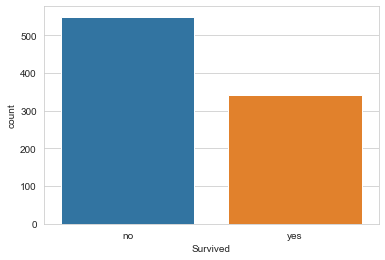

In [17]:
#Uni-Variate Analysis
sns.countplot(data['Survived'],data=data)

Observations:-
1. As we can see 'no' has value more than 500 which means that more than 500 passengers didn't survived in that disaster and the 'yes' has value approx 350 which means approx 350 passengers survived in that disaster.

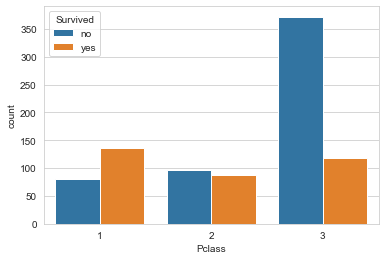

In [20]:
sns.countplot(data['Pclass'],hue='Survived',data=data)

Observations:-
1. In the output we can see that the passengers who travelled in 3rd class has highest number of deaths as compared to other class.
2. People who travelled in 2nd class has almost equal number of deaths and Survival.
3. People who travelled in 1st class has survived mostly and there is less number of deaths as compared to 2nd and 3rd class.
4. So we can conclude that passengers travelling in 3rd class had higher chance to die and the passengers travelling in 1st class had higher chance to survive.

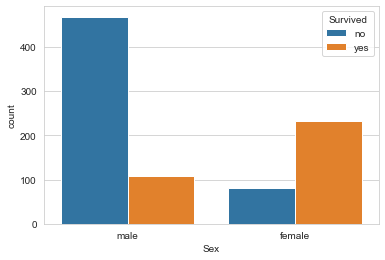

In [21]:
sns.countplot(data['Sex'],hue='Survived',data=data)

Observations:-
1. Out of all male passengers, most of them died and out of all female passengers, most of them survived.
2. So from this we can say that male has higher chance to die and female has higher chance to survive. Priorities were given to ladies.

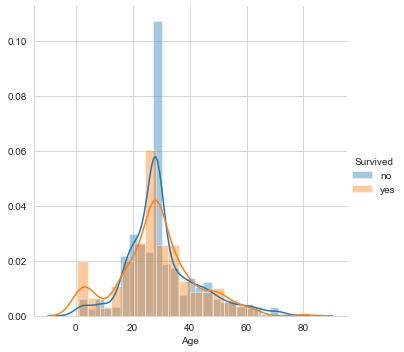

In [23]:
#Age feature consist of some null values so first we have to fill that null values by 28 as it is median
data = data.fillna(28)
#age feature is a numerical value so we cannot use countplot for this instead we can use pdf plot in this feature
sns.FacetGrid(data, hue="Survived", height=5).map(sns.distplot, "Age").add_legend()
plt.show()

Observations:-
1. First we filled the missing values in age using median value.
2. In this we can see that less than 20 years of age (Children or Teenagers) has more number of survival's than number of deaths. That means at the time of rescuing, children or teenagers were given the highest priority.
3. Between the age of 20 and 50, the number of people who died is more than the number of people survived.
4. More than 50 years of age, the pdf is not clear to analyse.

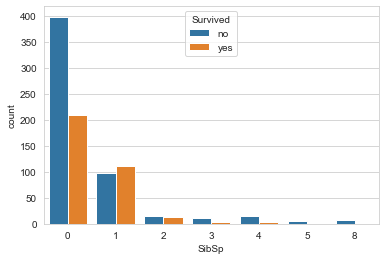

In [24]:
sns.countplot(data['SibSp'],hue='Survived',data=data)

Observations:-
1. Here we can see that mostly those passengers who don't have any siblings died.
2. Those who had 1 sibling has equal chance of survival and death.
3. Those passengers who has higher number of siblings like 3,4,5,8 has a very low chance to survive.

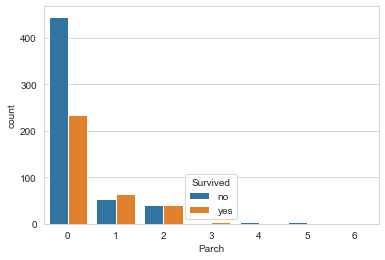

In [25]:
sns.countplot(data['Parch'],hue='Survived',data=data)

Observations:-
Almost same as the SibSp feature.

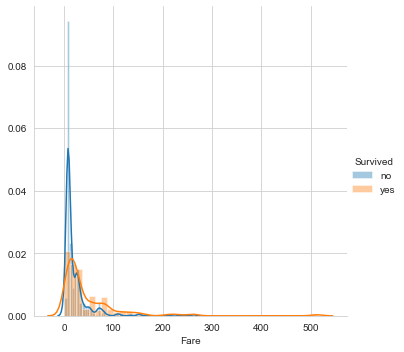

In [26]:
sns.FacetGrid(data, hue="Survived", height=5).map(sns.distplot, "Fare").add_legend()
plt.show()

Observations:-
1. Passengers who paid lower fair has highest chance of death and on the other hand the passengers who paid high fair has highest chance of survival. This means that the passengers who are poor has the highest chance for death and the passengers who are rich has highest chance to survive.

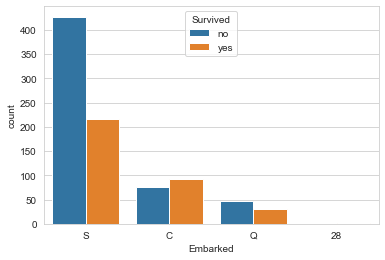

In [27]:
sns.countplot(data['Embarked'],hue='Survived',data=data)

Observations:-
1. Passengers who started their journey from Southampton, most of them died.
2. There is no any major differences in the people surviving or not surviving who started their journey from Cherbourg and Queenstown.